[I 2024-10-04 14:46:11,609] Using an existing study with name 'gcn_Cora_label_0.5_scrub_0_5_63' instead of creating a new one.
[I 2024-10-04 14:46:11,768] Using an existing study with name 'gcn_Cora_label_0.5_yaum_0_5_63' instead of creating a new one.
[I 2024-10-04 14:46:11,841] Using an existing study with name 'gcn_Cora_label_0.5_cacdc_0_5_63' instead of creating a new one.
[I 2024-10-04 14:46:12,055] Using an existing study with name 'gcn_Cora_label_0.5_megu_0_5_63' instead of creating a new one.
[I 2024-10-04 14:46:12,131] Using an existing study with name 'gcn_Cora_label_0.5_gnndelete_0_5_63' instead of creating a new one.
[I 2024-10-04 14:46:12,207] Using an existing study with name 'gcn_Cora_label_0.5_gif_0_5_63' instead of creating a new one.


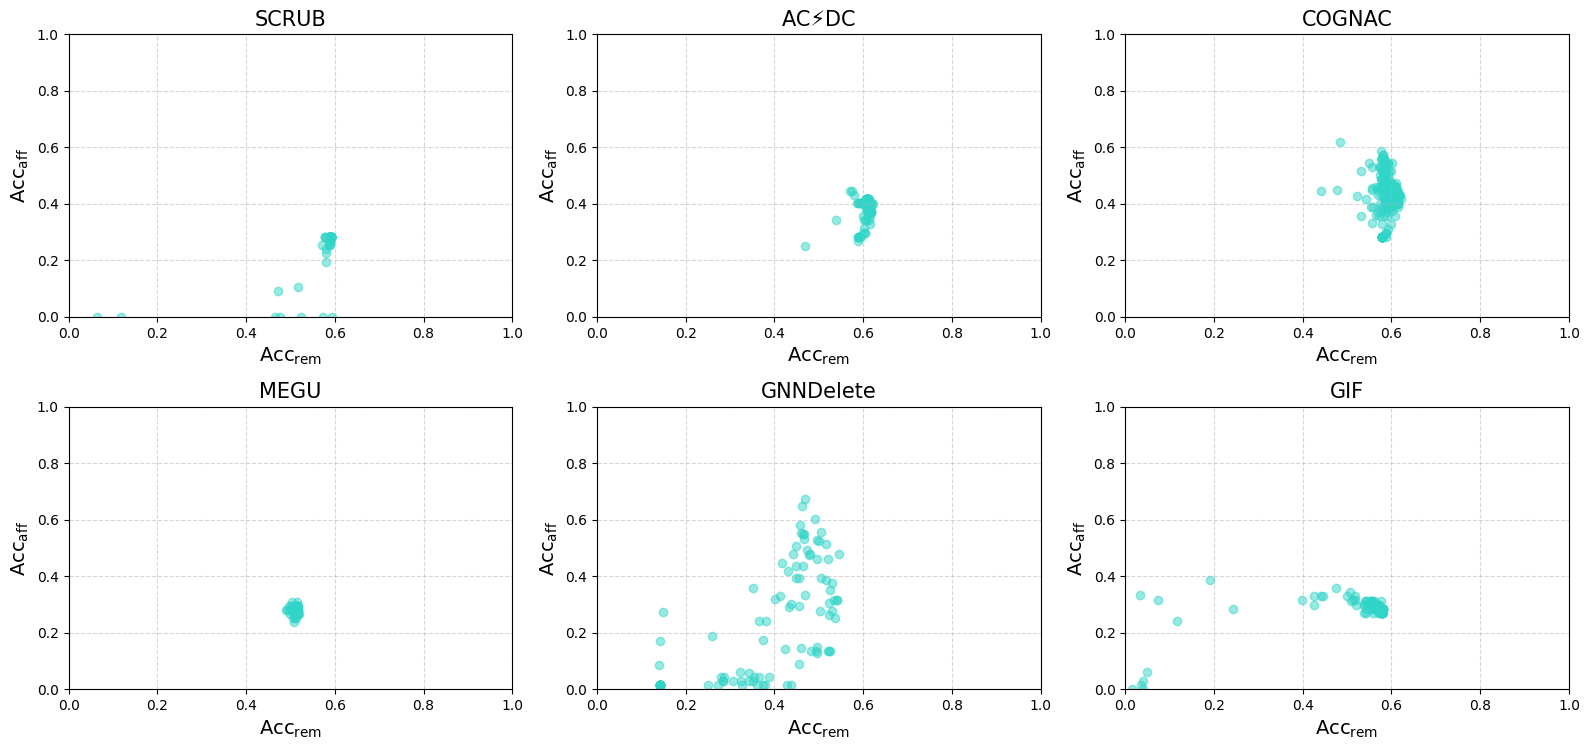

In [5]:
import optuna
from optuna.samplers import TPESampler
import matplotlib.pyplot as plt

methods = ["scrub", "yaum", "cacdc", "megu", "gnndelete", "gif"]
method_dict= {"scrub":"SCRUB", "yaum":"AC⚡︎DC", "cacdc":"COGNAC", "megu":"MEGU", "gnndelete":"GNNDelete", "gif":"GIF"}
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axs = axs.flatten()

for i, method in enumerate(methods):
    study = optuna.create_study(
        sampler=TPESampler(seed=42),
        direction="maximize",
        study_name=f"gcn_Cora_label_0.5_{method}_0_5_63",
        load_if_exists=True,
        storage=f"sqlite:///hp_tuning/new/label_main.db",
    )

    trials = study.get_trials()
    trials = [trial for trial in trials if trial.value is not None]
    trials = sorted(trials, key=lambda x: x.value, reverse=True)

    forgs = []
    utils = []

    for trial in trials:
        attributes = trial.user_attrs
        forg = attributes["forget_acc"]
        util = attributes["util_acc"]
        forgs.append(forg)
        utils.append(util)

    axs[i].scatter(utils, forgs, color='#30d5c8', alpha=0.5)
    # axs[i].set_ylabel("Unlearning", fontsize=12)
    # axs[i].set_xlabel("Utility", fontsize=12)
    axs[i].set_ylabel(r'$\mathrm{Acc}_{\mathrm{aff}}$', fontsize=14)
    axs[i].set_xlabel(r'$\mathrm{Acc}_{\mathrm{rem}}$', fontsize=14)

    axs[i].set_title(method_dict[method], fontsize=15)
    axs[i].grid(True, linestyle='--', alpha=0.5)

    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(0, 1)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()